# Dimensionality Reduction

## Principal Component Analysis

In [3]:
import numpy as np
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.15)

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [5]:
c1, c2

(array([ 0.94772452, -0.3190897 ]), array([0.3190897 , 0.94772452]))

In [6]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [7]:
X2D

array([[-1.49389552, -0.5442733 ],
       [-1.48245616, -0.18916121],
       [-0.96912187,  0.40446288],
       ...,
       [ 1.08627704, -0.4234166 ],
       [-0.23256508,  0.56103506],
       [ 0.5097354 , -0.56160053]])

### Using Scikit-Learn

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X2D

array([[ 1.49389552, -0.5442733 ],
       [ 1.48245616, -0.18916121],
       [ 0.96912187,  0.40446288],
       ...,
       [-1.08627704, -0.4234166 ],
       [ 0.23256508,  0.56103506],
       [-0.5097354 , -0.56160053]])

In [9]:
pca.explained_variance_ratio_

array([0.8050269, 0.1949731])

### Choosing right number of dimensions

In [10]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)

d = np.argmax(cumsum >= 0.95) + 1
print(d)

[0.8050269 1.       ]
2


In [13]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
X_reduced

array([[ 1.49389552, -0.5442733 ],
       [ 1.48245616, -0.18916121],
       [ 0.96912187,  0.40446288],
       ...,
       [-1.08627704, -0.4234166 ],
       [ 0.23256508,  0.56103506],
       [-0.5097354 , -0.56160053]])

In [14]:
pca.explained_variance_ratio_

array([0.8050269, 0.1949731])

## PCA for compression

In [20]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
len(X[0])

784

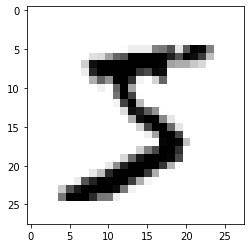

In [21]:
import matplotlib.pyplot as plt

digit_5_image = X[0].reshape(28, 28)
plt.imshow(digit_5_image, cmap="binary")
plt.show()

In [22]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
len(X_reduced[0])

154

In [25]:
digit_5_image = X_reduced[0].reshape(12, 12)
plt.imshow(digit_5_image, cmap="binary")
plt.show()

ValueError: cannot reshape array of size 154 into shape (12,12)

## Randomized PCA

In [26]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)
len(X_reduced[0])

154

## Incremental PCA

In [27]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)
len(X_reduced[0])

154

## Kernel PCA

In [30]:
# from sklearn.decomposition import KernelPCA

# rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)

# X_reduced = rbf_pca.fit_transform(X_train)
# len(X_reduced[0])